# Installing Dependancies

In [ ]:
import os
import cv2
import imghdr
import tensorflow as tf

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
data_dir = '/content/drive/MyDrive/shot_dataset'    #shot_dataset is available at https://drive.google.com/drive/folders/1afmTG1yzCUOBr2DZ911KWyxItAu0j1f3?usp=share_link 

Mounted at /content/drive


In [ ]:
os.listdir(data_dir)  #dataset currently contains Extreme Cloe-up, Close-up, Medium and Extreme Long Shots 

['Close Up', 'Extreme Long Shot', 'Extreme Close Up', 'Medium']

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/shot_dataset')

Found 1846 files belonging to 4 classes.


In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
#get a batch of images
batch = data_iterator.next()

In [ ]:
batch[0].shape   #images represented as numpy arrays

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 2, 2, 0, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 2, 2, 3, 2, 1, 0,
       2, 0, 0, 3, 2, 2, 2, 3, 2, 0], dtype=int32)

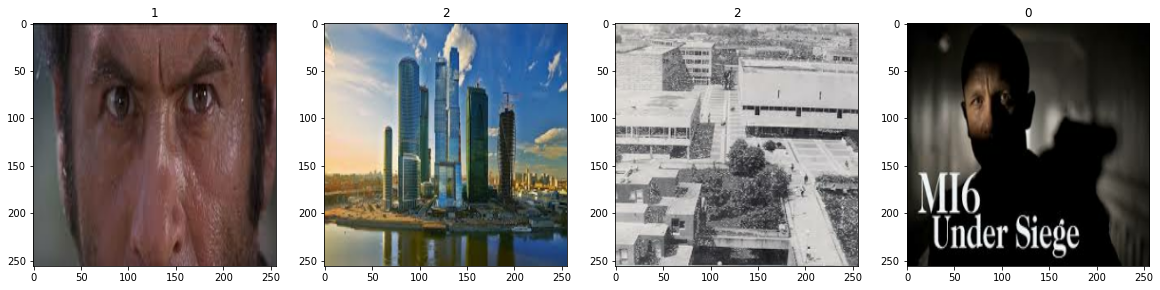

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Pre-Processing Data

In [ ]:
#Scale Data

In [ ]:
data = data.map(lambda x, y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

In [ ]:
scaled.max()

1.0

# Splitting Data

In [ ]:
len(data)  #total batches is 65

58

In [ ]:
train_size = int(len(data)*0.7)   #45 training batches
val_size = int(len(data)*0.2) #13 val batches
test_size = int(len(data)*0.1) + 2 #7 test batches

In [ ]:
test_size

7

In [ ]:
train_size+val_size+test_size

58

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(train_size)

In [ ]:
len(test)

7

# Building the Deep Learning Model

In [ ]:
#Building the deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 30, 30, 16)     

In [ ]:
#train
logdir ='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
40/40 [==============================] - 79s 2s/step - loss: 0.0000e+00 - accuracy: 0.1953 - val_loss: 0.0000e+00 - val_accuracy: 0.1619
Epoch 2/10
40/40 [==============================] - 78s 2s/step - loss: 0.0000e+00 - accuracy: 0.2016 - val_loss: 0.0000e+00 - val_accuracy: 0.1932
Epoch 3/10
40/40 [==============================] - 76s 2s/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.1903
Epoch 4/10
40/40 [==============================] - 78s 2s/step - loss: 0.0000e+00 - accuracy: 0.2031 - val_loss: 0.0000e+00 - val_accuracy: 0.2301
Epoch 5/10
40/40 [==============================] - 76s 2s/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 6/10
40/40 [==============================] - 76s 2s/step - loss: 0.0000e+00 - accuracy: 0.1945 - val_loss: 0.0000e+00 - val_accuracy: 0.2074
Epoch 7/10
40/40 [==============================] - 74s 2s/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss

KeyboardInterrupt: ignored

In [ ]:
hist.history